In [1]:
import pandas as pd

data = pd.read_csv("CKD.csv")

data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   age     400 non-null    object
 2   bp      400 non-null    object
 3   sg      400 non-null    object
 4   al      400 non-null    object
 5   su      400 non-null    object
 6   rbc     400 non-null    object
 7   pc      400 non-null    object
 8   pcc     400 non-null    object
 9   ba      400 non-null    object
 10  bgr     400 non-null    object
 11  bu      400 non-null    object
 12  sc      400 non-null    object
 13  sod     400 non-null    object
 14  pot     400 non-null    object
 15  hemo    400 non-null    object
 16  pcv     400 non-null    object
 17  wbcc    400 non-null    object
 18  rbcc    400 non-null    object
 19  htn     400 non-null    object
 20  dm      400 non-null    object
 21  cad     400 non-null    object
 22  appet   400 non-null    ob

In [3]:
import numpy as np

data.replace("?", np.nan, inplace=True)

data.isnull().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [4]:
data.describe()

,id
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [5]:
numeric_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

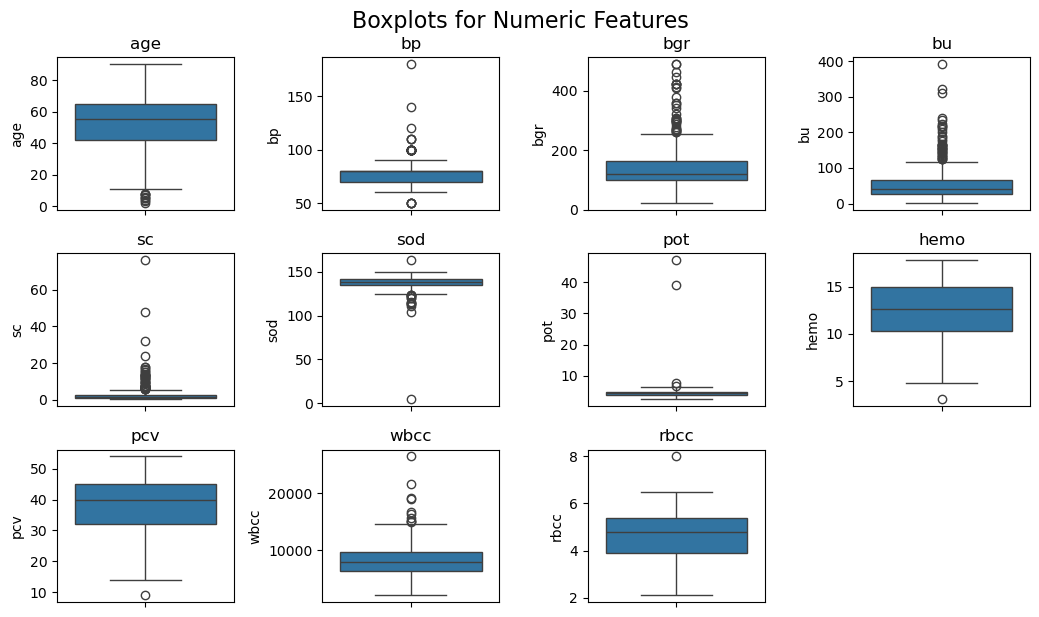

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10.5, 6))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1) 
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.suptitle("Boxplots for Numeric Features", fontsize=16, y=1.02)
plt.show()


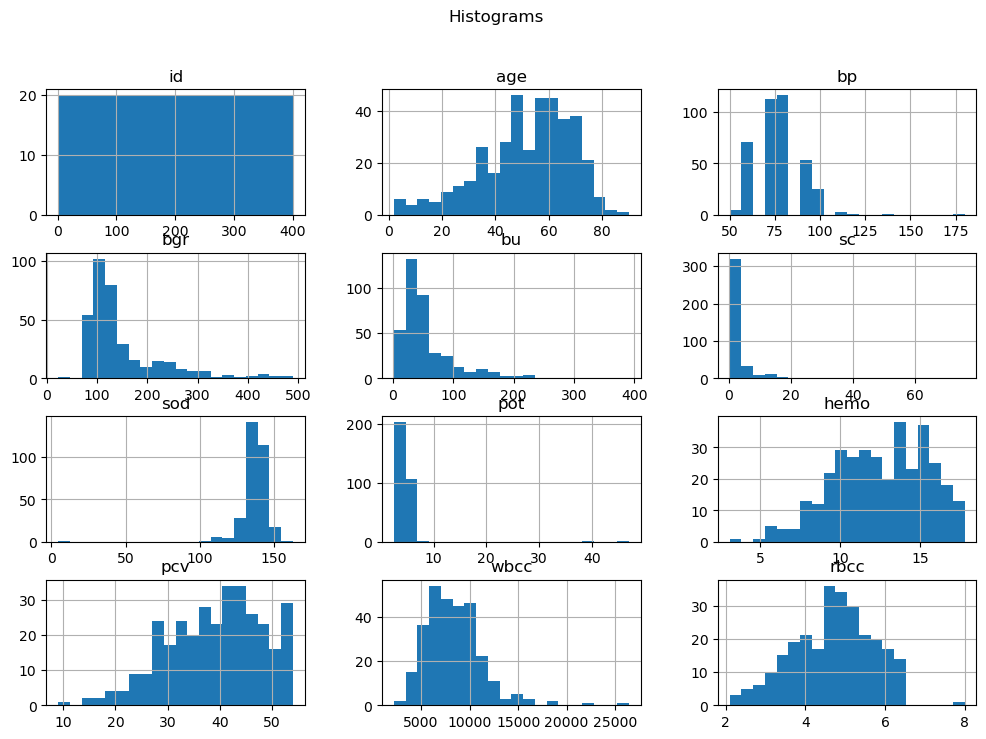

In [7]:
data.hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms")
plt.show()

In [8]:
import numpy as np

data.replace("?", np.nan, inplace=True)

missing_counts = data.isnull().sum()
print("count:")
print(missing_counts)


count:
id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [9]:
missing_cols = missing_counts[missing_counts > 0]
print("\nmissing columns:")
print(missing_cols)


missing columns:
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [10]:
missing_percentage = data.isnull().mean(axis=1) * 100
print(missing_percentage)

0      11.538462
1      19.230769
2      11.538462
3       0.000000
4       7.692308
         ...    
395     0.000000
396     0.000000
397     0.000000
398     0.000000
399     0.000000
Length: 400, dtype: float64


In [11]:
threshold = 30
data_cleaned = data[missing_percentage < threshold]

In [12]:
print(f"Original data shape: {data.shape}")
print(f"After removing rows with >30% missing: {data_cleaned.shape}")

Original data shape: (400, 26)
After removing rows with >30% missing: (369, 26)


In [13]:
print(data_cleaned)

      id   age    bp     sg al su     rbc        pc         pcc          ba  \
0      1  48.0  80.0   1.02  1  0     NaN    normal  notpresent  notpresent   
1      2   7.0  50.0   1.02  4  0     NaN    normal  notpresent  notpresent   
2      3  62.0  80.0   1.01  2  3  normal    normal  notpresent  notpresent   
3      4  48.0  70.0  1.005  4  0  normal  abnormal     present  notpresent   
4      5  51.0  80.0   1.01  2  0  normal    normal  notpresent  notpresent   
..   ...   ...   ...    ... .. ..     ...       ...         ...         ...   
395  396  55.0  80.0   1.02  0  0  normal    normal  notpresent  notpresent   
396  397  42.0  70.0  1.025  0  0  normal    normal  notpresent  notpresent   
397  398  12.0  80.0   1.02  0  0  normal    normal  notpresent  notpresent   
398  399  17.0  60.0  1.025  0  0  normal    normal  notpresent  notpresent   
399  400  58.0  80.0  1.025  0  0  normal    normal  notpresent  notpresent   

     ...   pcv    wbcc  rbcc  htn   dm  cad  appet 

In [14]:
data_cleaned.isnull().sum()

id         0
age        7
bp        10
sg        27
al        27
su        28
rbc      124
pc        44
pcc        4
ba         4
bgr       33
bu        11
sc         9
sod       67
pot       68
hemo      32
pcv       42
wbcc      77
rbcc     100
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [15]:
for col in numeric_cols:
    data_cleaned.loc[:, col] = data_cleaned[col].astype(float)
    data_cleaned.loc[:, col] = data_cleaned[col].fillna(data_cleaned[col].mean())

In [16]:
nominal_cols = data.columns.difference(numeric_cols).tolist()
for col in nominal_cols:
    data_cleaned.loc[:, col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

In [17]:
print("Total missing values left:", data_cleaned.isnull().sum().sum())

Total missing values left: 0


In [18]:
missing_data_after = data_cleaned.isnull().sum()
print(missing_data_after)

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [19]:
data_cleaned.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.02,1,0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.02,4,0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.01,2,3,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.01,2,0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [20]:
data_cleaned.isnull().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [21]:
outlier_data = data_cleaned.copy()

def find_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numeric_cols:
    outliers = find_outliers_iqr(outlier_data, col)
    print(f"{col}: {len(outliers)} outliers")

age: 8 outliers
bp: 35 outliers
bgr: 46 outliers
bu: 46 outliers
sc: 44 outliers
sod: 18 outliers
pot: 12 outliers
hemo: 1 outliers
pcv: 2 outliers
wbcc: 15 outliers
rbcc: 30 outliers


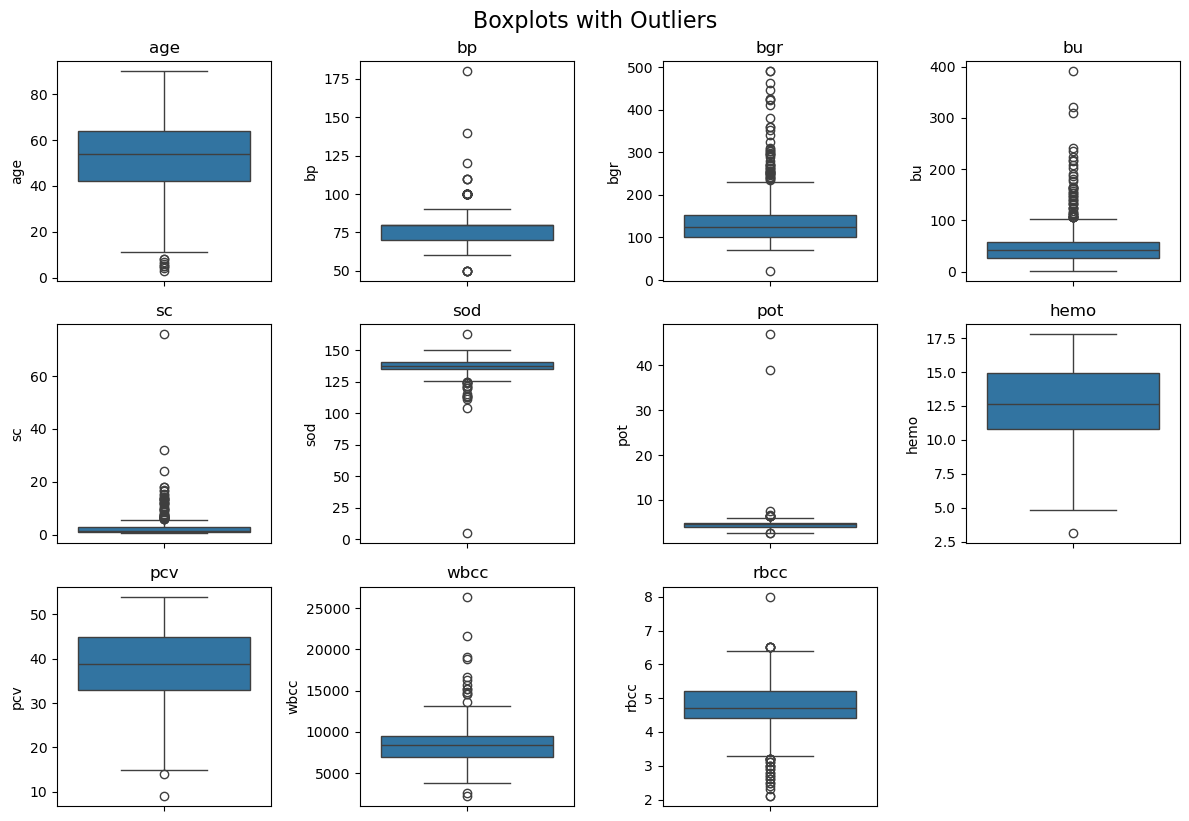

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=outlier_data[col])
    plt.title(col)

plt.tight_layout()
plt.suptitle("Boxplots with Outliers", fontsize=16, y=1.02)
plt.show()


In [23]:
data_no_outliers = data_cleaned.copy()

for col in numeric_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = data_cleaned[col].median()
    outlier_mask = (data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)
    data_no_outliers.loc[outlier_mask, col] = median_value


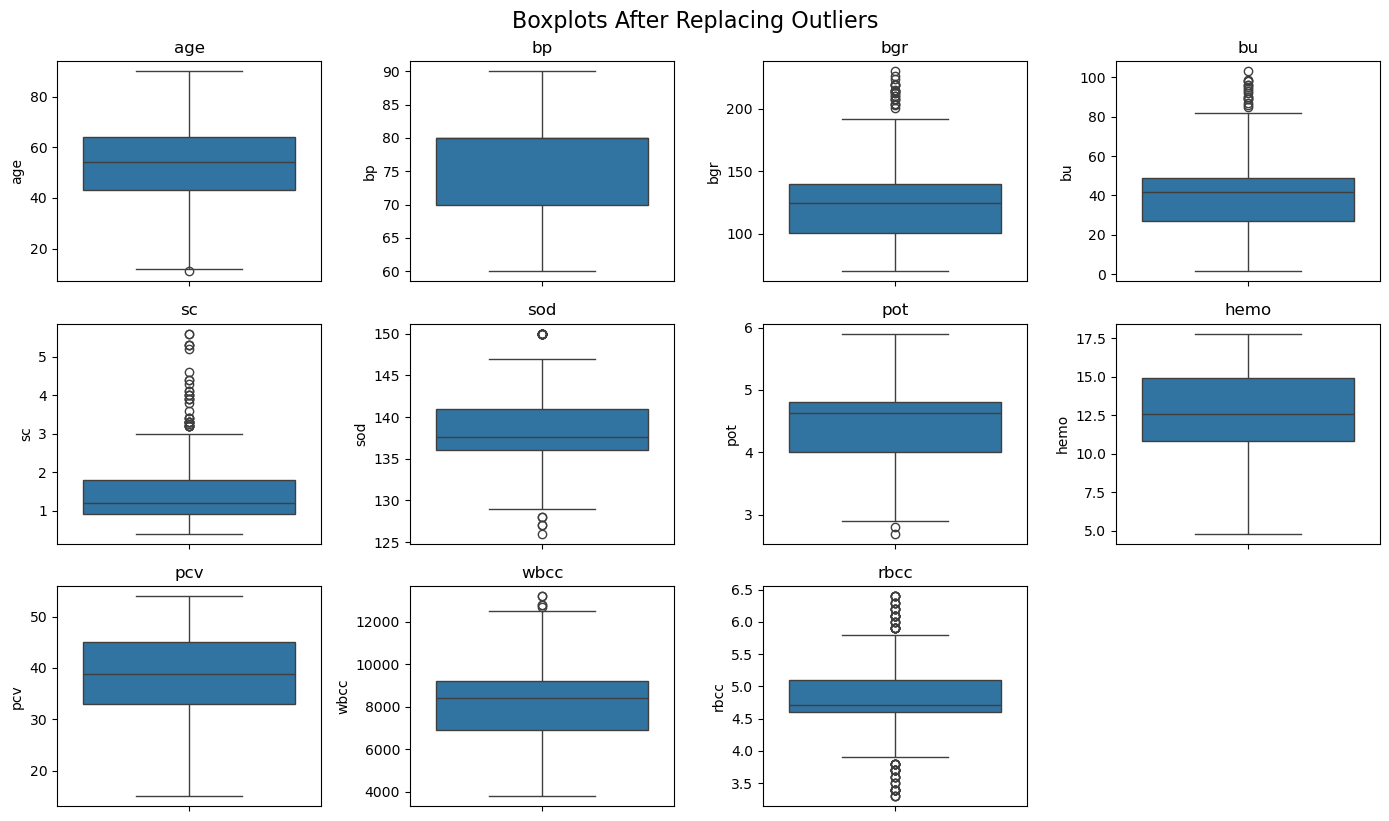

In [24]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data_no_outliers[col])
    plt.title(col)

plt.tight_layout()
plt.suptitle("Boxplots After Replacing Outliers", fontsize=16, y=1.02)
plt.show()


In [25]:
print("Remaining outliers after replacement:")
for col in numeric_cols:
    Q1 = data_no_outliers[col].quantile(0.25)
    Q3 = data_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data_no_outliers[col] < lower_bound) | (data_no_outliers[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers")


Remaining outliers after replacement:
age: 1 outliers
bp: 0 outliers
bgr: 22 outliers
bu: 17 outliers
sc: 34 outliers
sod: 22 outliers
pot: 2 outliers
hemo: 0 outliers
pcv: 0 outliers
wbcc: 5 outliers
rbcc: 68 outliers


In [26]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

numeric_data = data_cleaned[numeric_cols]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

data_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

print(data_scaled.describe())

                age            bp           bgr            bu            sc  \
count  3.690000e+02  3.690000e+02  3.690000e+02  3.690000e+02  3.690000e+02   
mean  -2.310708e-16 -1.540472e-16  2.503267e-16 -5.776770e-17  1.925590e-17   
std    1.001358e+00  1.001358e+00  1.001358e+00  1.001358e+00  1.001358e+00   
min   -2.901721e+00 -1.932264e+00 -1.693865e+00 -1.105317e+00 -4.717517e-01   
25%   -5.649178e-01 -4.718793e-01 -6.249712e-01 -5.905277e-01 -3.773961e-01   
50%    1.540986e-01  2.583132e-01 -3.002439e-01 -2.877103e-01 -3.207828e-01   
75%    7.532789e-01  2.583132e-01  7.860463e-02  3.529486e-02 -1.884491e-02   
max    2.311148e+00  7.560239e+00  4.638317e+00  6.757840e+00  1.379481e+01   

                sod           pot          hemo           pcv          wbcc  \
count  3.690000e+02  3.690000e+02  3.690000e+02  3.690000e+02  3.690000e+02   
mean   9.050273e-16  5.776770e-17 -1.540472e-16  1.925590e-16  3.851180e-17   
std    1.001358e+00  1.001358e+00  1.001358e+00  1.

In [27]:
from sklearn.preprocessing import LabelEncoder

encoded_data = data_cleaned.copy()

le = LabelEncoder()

for col in nominal_cols:
    encoded_data[col] = le.fit_transform(encoded_data[col])

print(encoded_data[nominal_cols].head())

   al  ane  appet  ba  cad  class  dm  htn  id  pc  pcc  pe  rbc  sg  su
0   1    0      0   0    0      0   1    1   0   1    0   0    1   3   0
1   4    0      0   0    0      0   0    0   1   1    0   0    1   3   0
2   2    1      1   0    0      0   1    0   2   1    0   0    1   1   3
3   4    1      1   0    0      0   0    1   3   0    1   1    1   0   0
4   2    0      0   0    0      0   0    0   4   1    0   0    1   1   0


In [28]:
multiclass_cols = ['rbc', 'pc', 'appet']

data_encoded = pd.get_dummies(data_cleaned, columns=multiclass_cols, drop_first=True)

print("ستون‌های جدید بعد از One-Hot Encoding:")
print([col for col in data_encoded.columns if any(prefix in col for prefix in multiclass_cols)])

print("\nشکل نهایی داده‌ها:")
print(data_encoded.shape)
data_encoded.head()


ستون‌های جدید بعد از One-Hot Encoding:
['pcc', 'pcv', 'rbcc', 'rbc_normal', 'pc_normal', 'appet_poor']

شکل نهایی داده‌ها:
(369, 26)


,id,age,bp,sg,al,su,pcc,ba,bgr,bu,...,rbcc,htn,dm,cad,pe,ane,class,rbc_normal,pc_normal,appet_poor
0,1,48.0,80.0,1.02,1,0,notpresent,notpresent,121.000000,36.0,...,5.200000,yes,yes,no,no,no,ckd,True,True,False
1,2,7.0,50.0,1.02,4,0,notpresent,notpresent,147.190476,18.0,...,4.707435,no,no,no,no,no,ckd,True,True,False
2,3,62.0,80.0,1.01,2,3,notpresent,notpresent,423.000000,53.0,...,4.707435,no,yes,no,no,yes,ckd,True,True,True
3,4,48.0,70.0,1.005,4,0,present,notpresent,117.000000,56.0,...,3.900000,yes,no,no,yes,yes,ckd,True,False,True
4,5,51.0,80.0,1.01,2,0,notpresent,notpresent,106.000000,26.0,...,4.600000,no,no,no,no,no,ckd,True,True,False


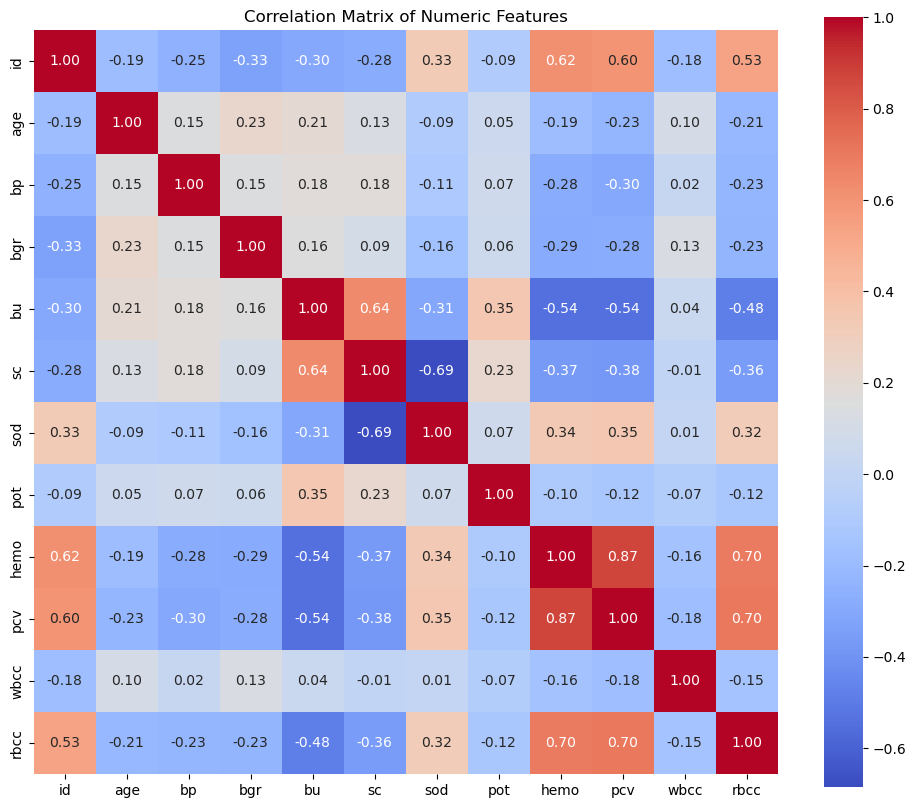

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = data_encoded.select_dtypes(include=[np.number])

corr_matrix = numeric_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

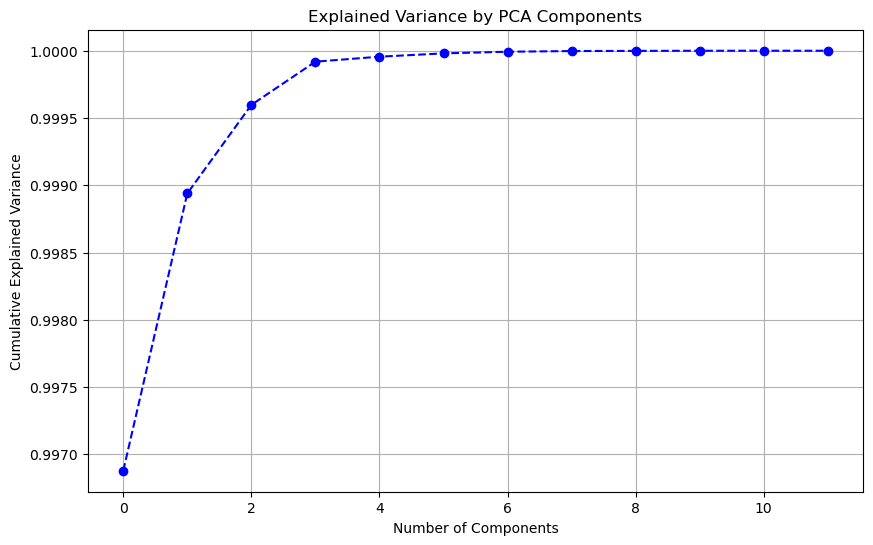

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(numeric_features)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


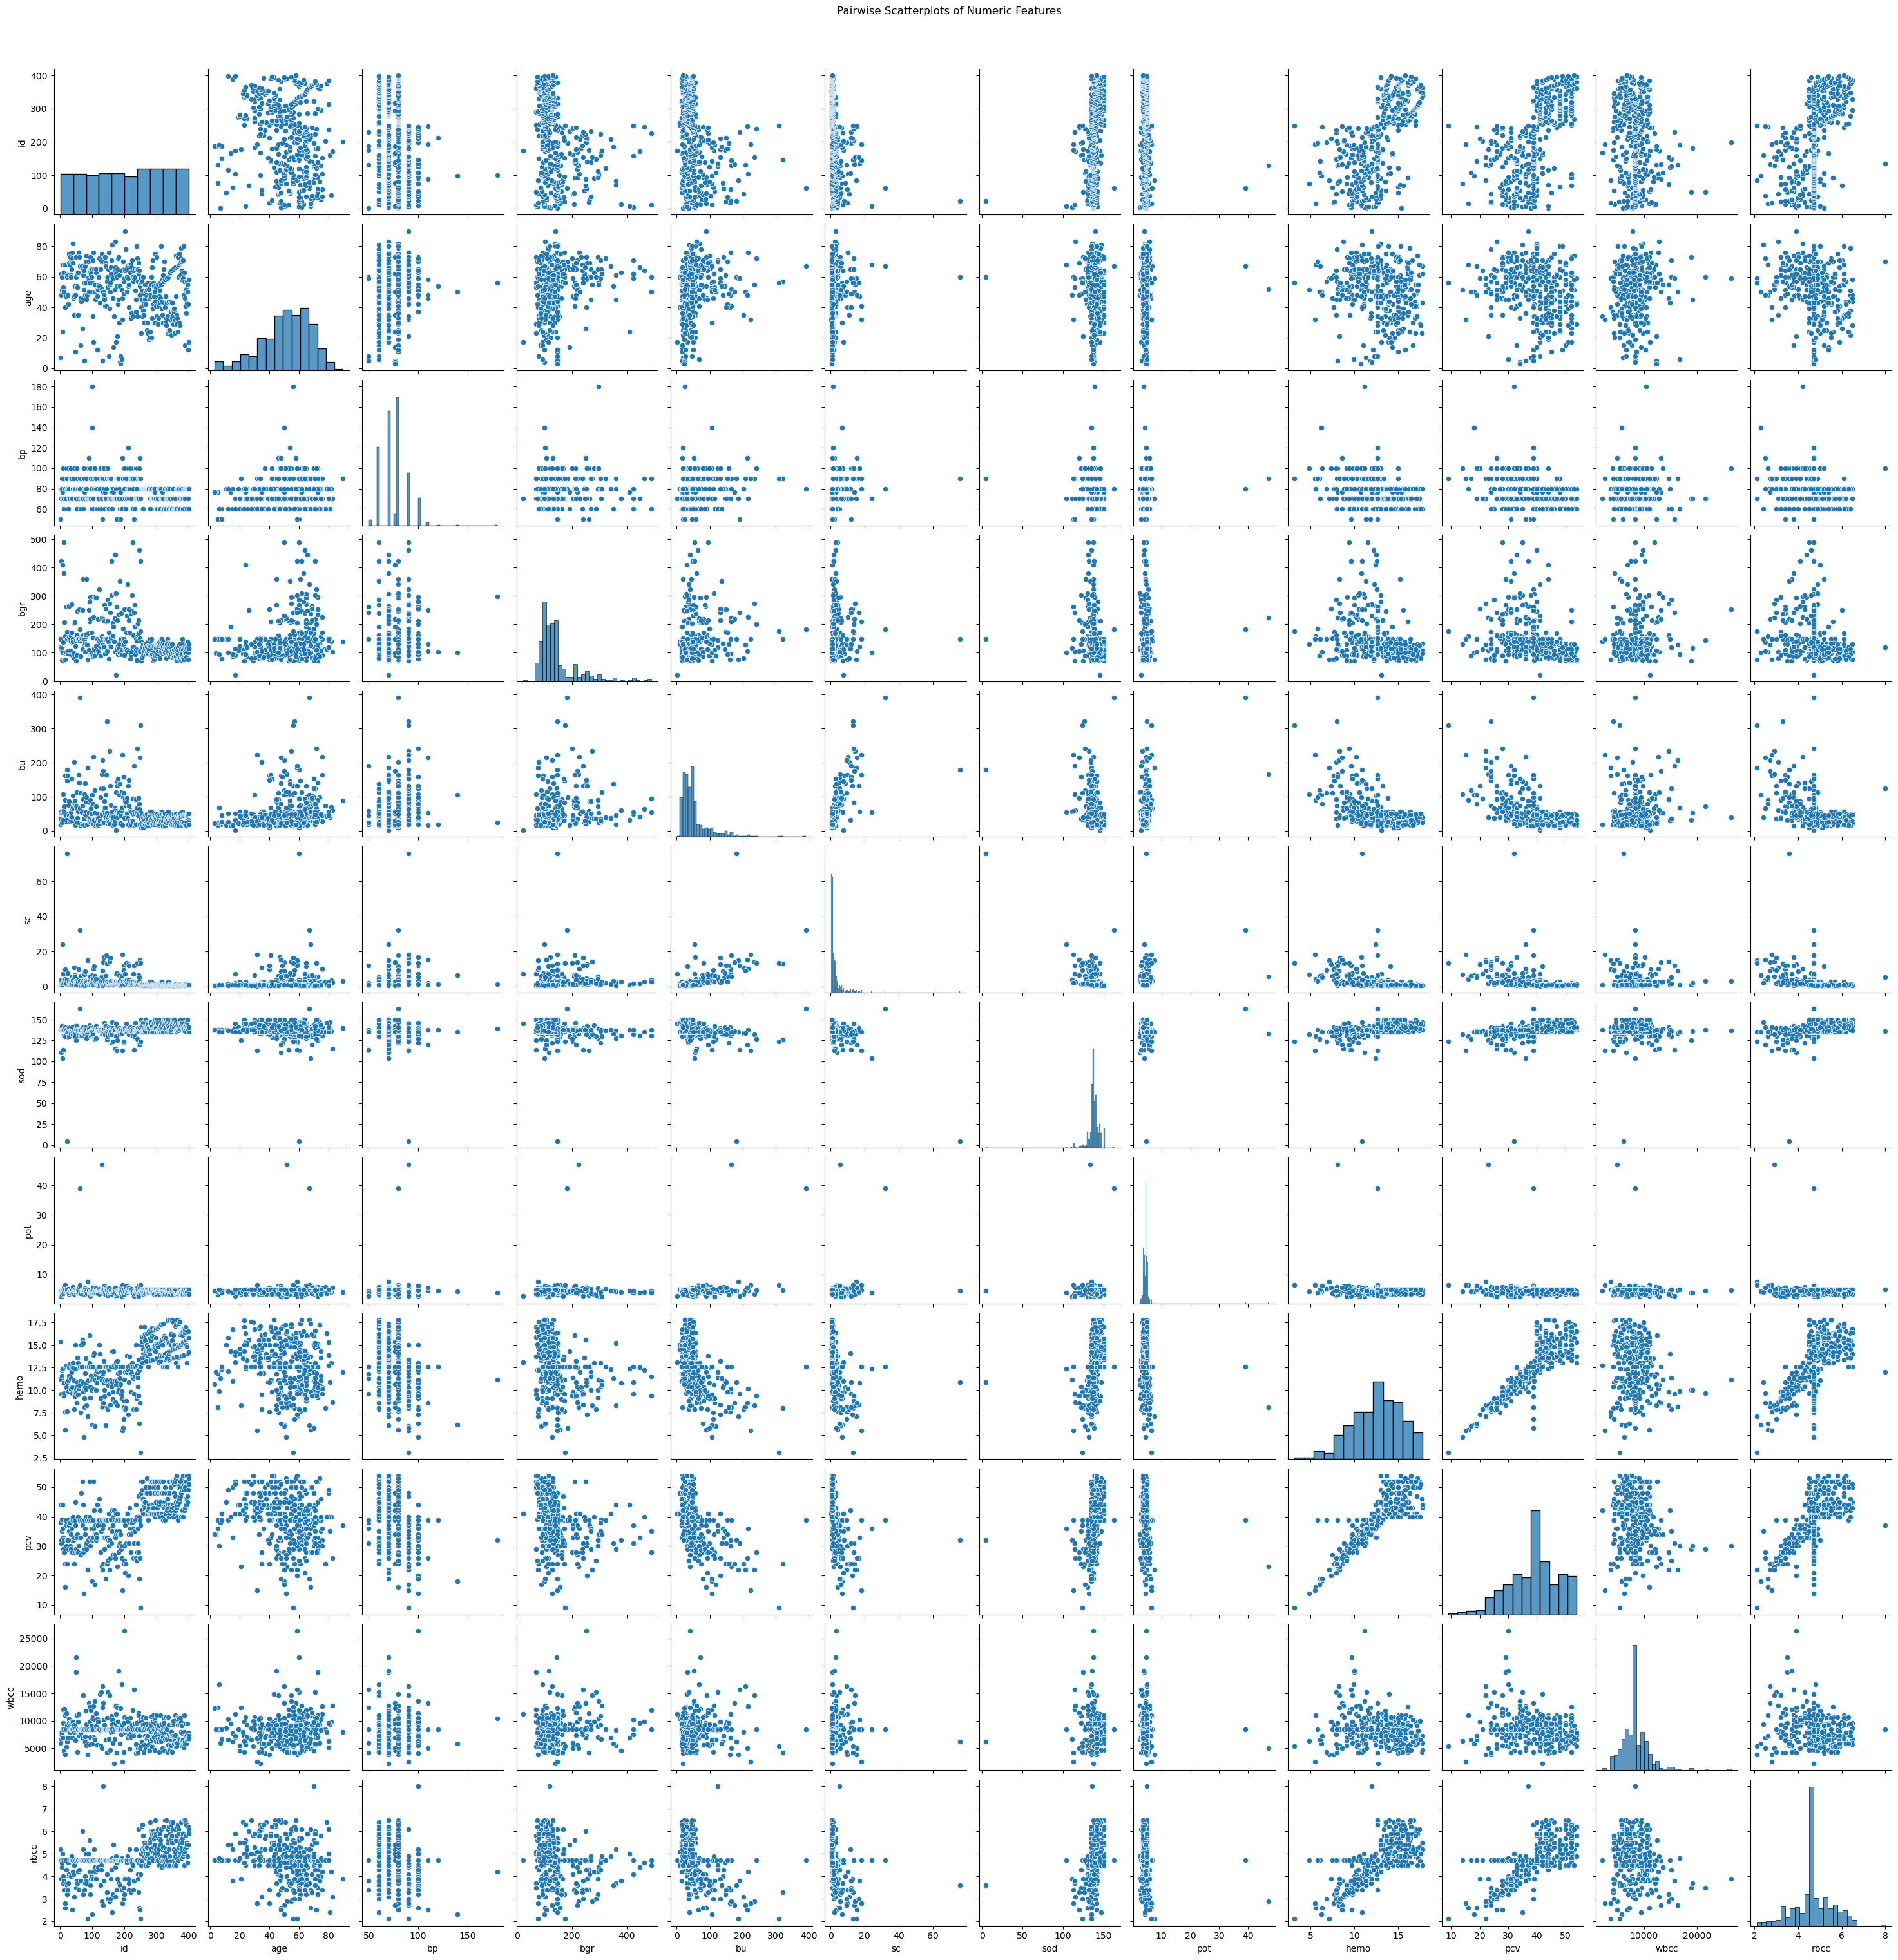

In [31]:
import seaborn as sns
sns.pairplot(numeric_features)
plt.suptitle("Pairwise Scatterplots of Numeric Features", y=1.02)
plt.show()

In [32]:
print("Number of rows in data_encoded before reset:", data_encoded.shape[0])
print("Number of rows in numeric_features before reset:", numeric_features.shape[0])

data_encoded.reset_index(drop=True, inplace=True)
numeric_features.reset_index(drop=True, inplace=True)

print("Number of rows in data_encoded after reset:", data_encoded.shape[0])
print("Number of rows in numeric_features after reset:", numeric_features.shape[0])

if data_encoded.shape[0] == numeric_features.shape[0]:
    pca_final = PCA(n_components=4)
    principal_components = pca_final.fit_transform(numeric_features)

    pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

    final_df = pd.concat([pca_df, data_encoded.drop(columns=numeric_features.columns)], axis=1)

    print("Final shape after PCA:", final_df.shape)
    final_df.head()
else:
    print("Error: Number of rows in data_encoded and numeric_features do not match!")


Number of rows in data_encoded before reset: 369
Number of rows in numeric_features before reset: 369
Number of rows in data_encoded after reset: 369
Number of rows in numeric_features after reset: 369
Final shape after PCA: (369, 18)


In [33]:
final_df.to_csv("cleaned_ckd_data.csv", index=False, encoding='utf-8-sig')

In [34]:
final_df.shape

(369, 18)

In [35]:
#phase 2 project

In [36]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

# بارگذاری داده تمیز
data = pd.read_csv("cleaned_ckd_data.xls", encoding="utf-8-sig")

# حذف ردیف‌هایی که کلاس ندارند
data = data.dropna(subset=['class'])

# یکسان‌سازی نام کلاس‌ها
data['class'] = data['class'].str.strip().str.lower()

# تقسیم داده‌ها
ckd_data = data[data['class'] == 'ckd']
notckd_data = data[data['class'] == 'notckd']

# تشخیص ویژگی‌های عددی و اسمی
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col != 'class']

# تحلیل آماری ویژگی‌های عددی
numerical_results = []
for feature in numerical_features:
    ckd_vals = ckd_data[feature].dropna()
    notckd_vals = notckd_data[feature].dropna()
    if not ckd_vals.empty and not notckd_vals.empty:
        stat, p = ttest_ind(ckd_vals, notckd_vals, equal_var=False)
        numerical_results.append({
            "Feature": feature,
            "CKD_Mean": round(ckd_vals.mean(), 2),
            "NotCKD_Mean": round(notckd_vals.mean(), 2),
            "p-value": round(p, 5)
        })

numerical_summary = pd.DataFrame(numerical_results).sort_values(by="p-value")
display(numerical_summary)

# تحلیل آماری ویژگی‌های اسمی
categorical_results = []
for feature in categorical_features:
    contingency = pd.crosstab(data[feature], data['class'])
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2_stat, p, _, _ = chi2_contingency(contingency)
        categorical_results.append({"Feature": feature, "p-value": round(p, 5)})

categorical_summary = pd.DataFrame(categorical_results).sort_values(by="p-value")
display(categorical_summary)


,Feature,CKD_Mean,NotCKD_Mean,p-value
1,PC2,-82.80,120.89,0.00000
4,sg,1.01,1.02,0.00000
5,al,1.59,0.00,0.00000
6,su,0.69,0.00,0.00000
0,PC1,458.42,-669.29,0.00001
3,PC4,2.86,-4.18,0.09586
2,PC3,-0.08,0.12,0.97422


,Feature,p-value
0,pcc,0.00000
2,htn,0.00000
3,dm,0.00000
4,cad,0.00000
5,pe,0.00000
6,ane,0.00000
1,ba,0.00016


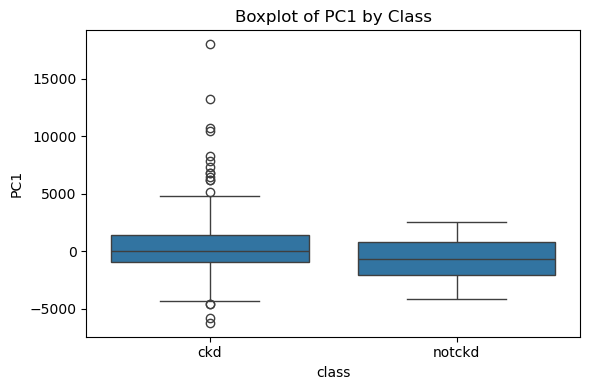

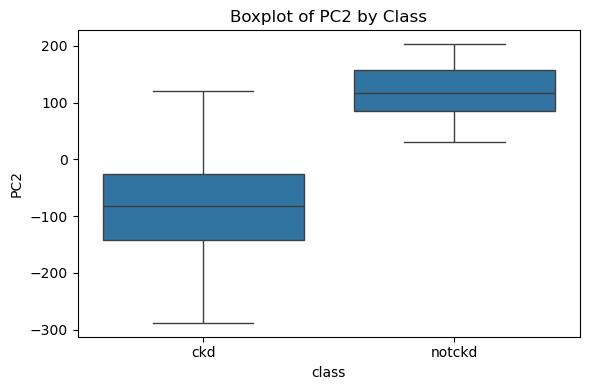

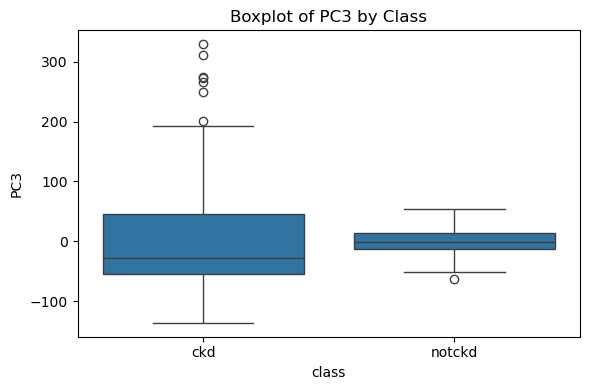

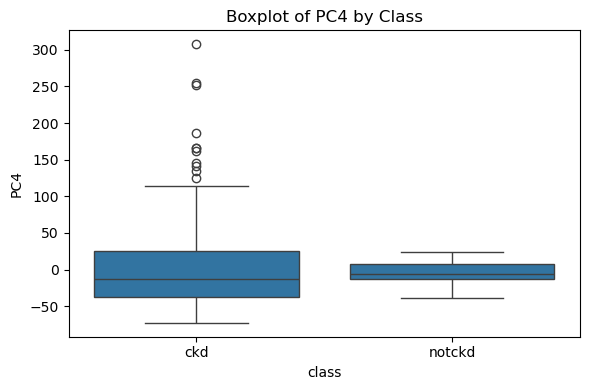

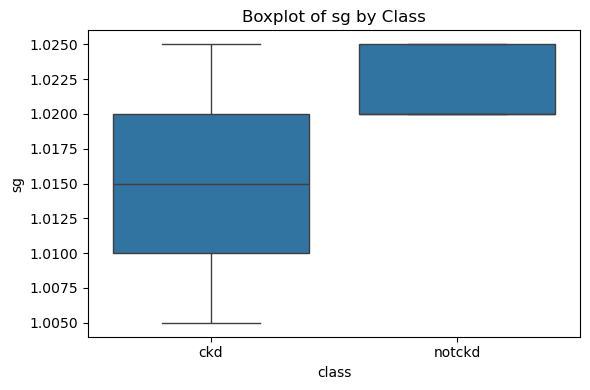

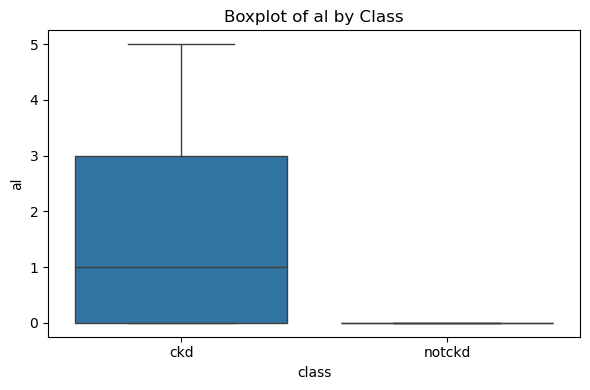

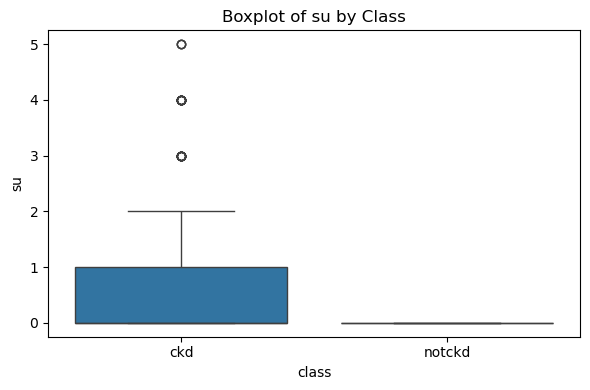

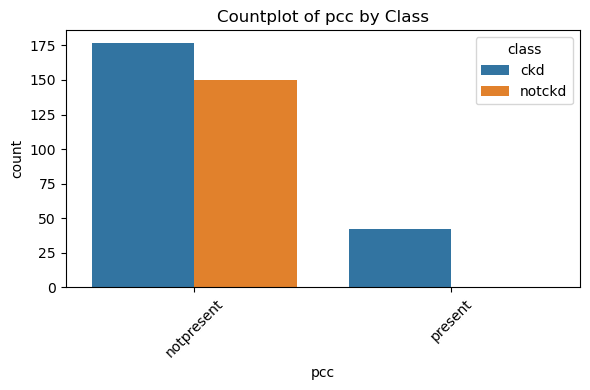

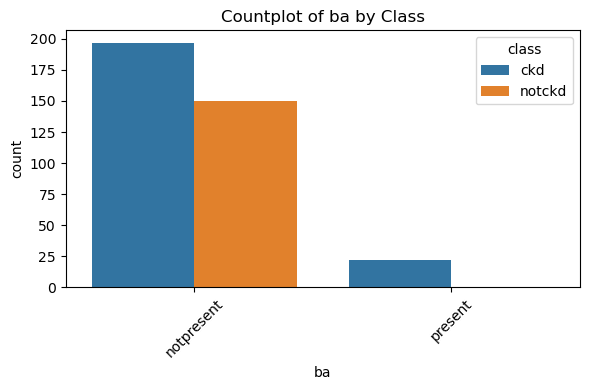

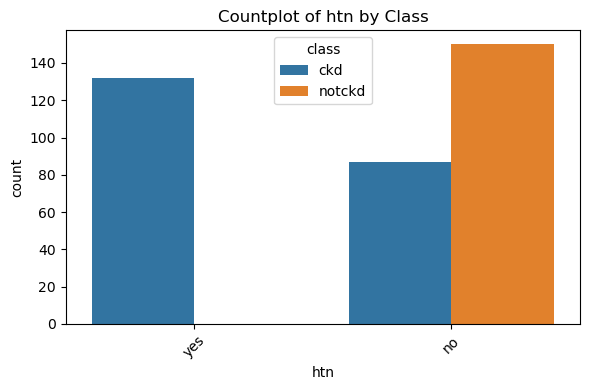

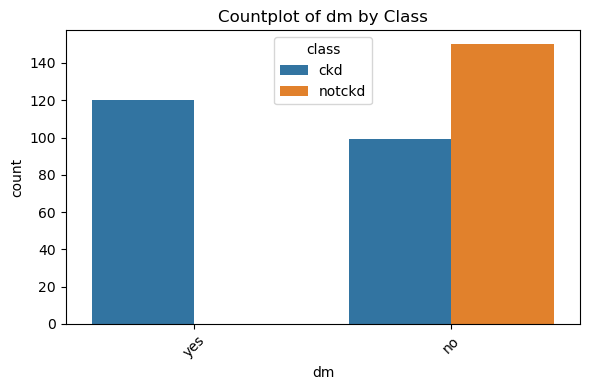

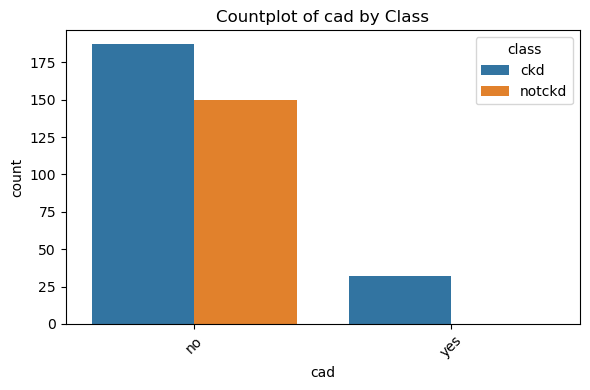

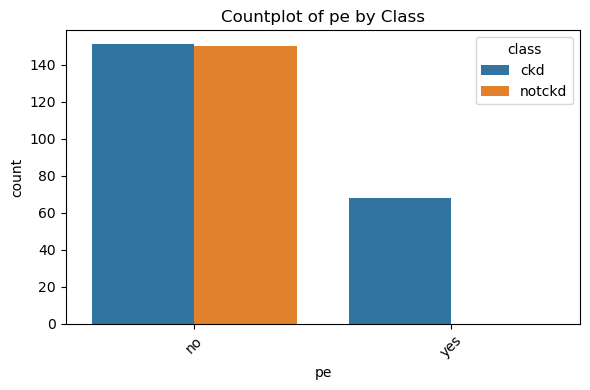

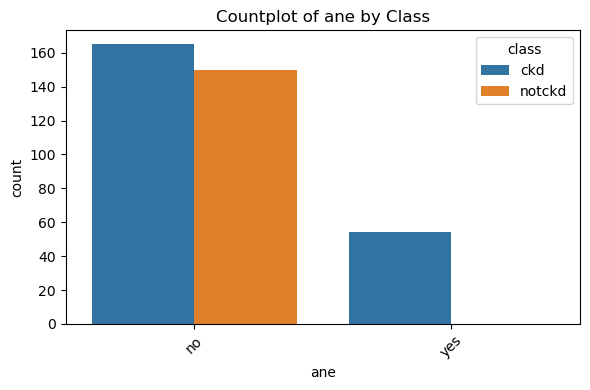

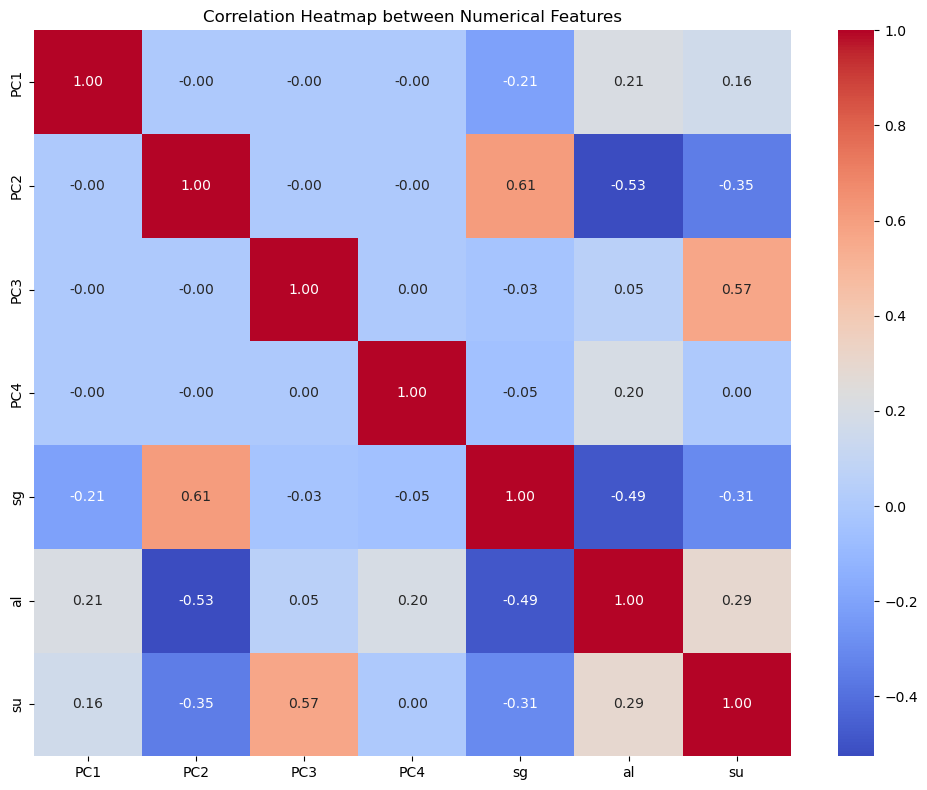

In [38]:
#  Boxplot ویژگی‌های عددی (تفاوت CKD و NotCKD)
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='class', y=feature)
    plt.title(f'Boxplot of {feature} by Class')
    plt.tight_layout()
    plt.show()

#  Countplot ویژگی‌های اسمی (توزیع برحسب کلاس)
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature, hue='class')
    plt.title(f'Countplot of {feature} by Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#  Heatmap همبستگی ویژگی‌های عددی
plt.figure(figsize=(10, 8))
corr = data[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Numerical Features")
plt.tight_layout()
plt.show()

In [40]:
print(data.columns.tolist())

['PC1', 'PC2', 'PC3', 'PC4', 'sg', 'al', 'su', 'pcc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane', 'class', 'rbc_normal', 'pc_normal', 'appet_poor']


In [49]:
from sklearn.preprocessing import StandardScaler

# انتخاب ویژگی‌های PCAشده
selected_features = ['PC1', 'PC2', 'PC3', 'PC4']

# حذف ردیف‌های ناقص (اگر وجود داشته باشه)
cluster_data = data[selected_features].dropna()

# نرمال‌سازی
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)


In [59]:
print("شکل داده انتخاب‌شده برای خوشه‌بندی:", cluster_data.shape)
print("چند نمونه اول بعد از نرمال‌سازی:")
import pandas as pd
pd.DataFrame(cluster_scaled, columns=selected_features).head()


شکل داده انتخاب‌شده برای خوشه‌بندی: (369, 4)
چند نمونه اول بعد از نرمال‌سازی:


,PC1,PC2,PC3,PC4
0,-0.230747,-1.577661,-1.296745,-1.035944
1,-0.917277,-1.729071,-0.923119,-1.517641
2,-0.344750,-2.366487,2.994964,-1.047356
3,-0.650310,-1.658779,-1.319407,-0.578786
4,-0.421488,-1.537472,-1.483851,-1.199832


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

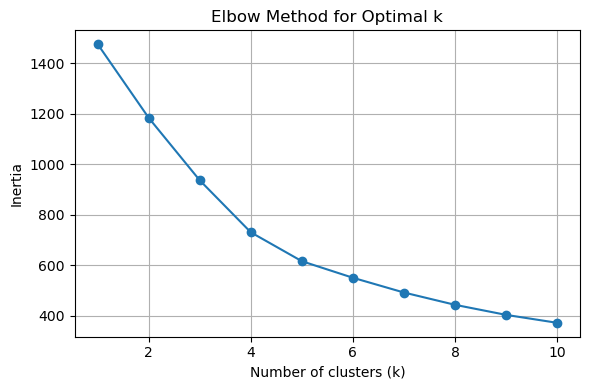

In [63]:
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"

# اجرای Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

# ترسیم نمودار Elbow
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
os.environ["OMP_NUM_THREADS"] = "2"

optimal_k = 5

#  اجرای خوشه‌بندی نهایی
kmeans_final = KMeans(n_clusters=optimal_k, random_state=0,
                      n_init=10)
clusters = kmeans_final.fit_predict(cluster_scaled)

#  اضافه‌کردن برچسب خوشه‌ها به داده اصلی
cluster_data_with_labels = cluster_data.copy()
cluster_data_with_labels['Cluster'] = clusters

#  محاسبه میانگین ویژگی‌ها در هر خوشه
cluster_centers = pd.DataFrame(kmeans_final.cluster_centers_,
                               columns=selected_features)
cluster_centers.index = [f"Cluster {i}" for i in range(optimal_k)]

display(cluster_centers)
display(cluster_data_with_labels.head())


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,PC1,PC2,PC3,PC4
Cluster 0,0.080698,-0.824432,-0.661183,-0.570440
Cluster 1,0.145046,-0.977624,2.101760,-0.484732
Cluster 2,3.201655,-0.025252,-0.123405,0.814808
Cluster 3,-0.244680,0.882165,0.002928,-0.055369
Cluster 4,-0.423346,-0.865321,-0.267340,2.056304


,PC1,PC2,PC3,PC4,Cluster
0,-604.953222,-188.070406,-87.350100,-48.763491,0
1,-2404.836995,-206.119764,-62.182275,-71.437701,0
2,-903.834545,-282.105077,201.743871,-49.300660,1
3,-1704.926069,-197.740282,-88.876615,-27.244335,0
4,-1105.019981,-183.279509,-99.953746,-56.477938,0


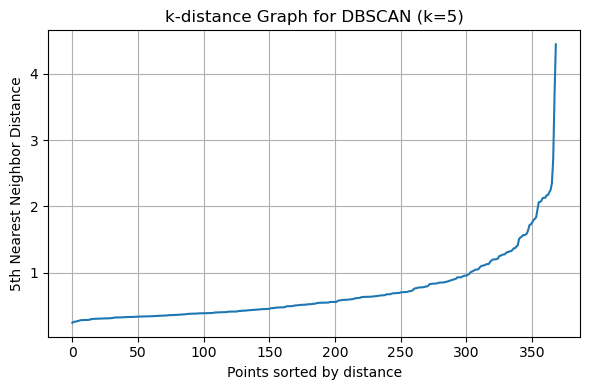

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

#  اول باید مقدار مناسب eps رو پیدا کنیم
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(cluster_scaled)
distances, indices = neighbors_fit.kneighbors(cluster_scaled)

#  رسم نمودار فاصله برای انتخاب eps
distances = np.sort(distances[:, 4])  # فاصله 5ام هر نقطه
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN (k=5)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
eps_value = 2.5 
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
db_labels = dbscan.fit_predict(cluster_scaled)

# اضافه کردن برچسب‌ها به داده
cluster_data_with_labels['DBSCAN_Cluster'] = db_labels

# نمایش چند نمونه
display(cluster_data_with_labels[['PC1', 'PC2', 'PC3', 'PC4', 'DBSCAN_Cluster']].head())

# نمایش تعداد نقاط در هر خوشه
print(cluster_data_with_labels['DBSCAN_Cluster'].value_counts())


,PC1,PC2,PC3,PC4,DBSCAN_Cluster
0,-604.953222,-188.070406,-87.350100,-48.763491,0
1,-2404.836995,-206.119764,-62.182275,-71.437701,0
2,-903.834545,-282.105077,201.743871,-49.300660,0
3,-1704.926069,-197.740282,-88.876615,-27.244335,0
4,-1105.019981,-183.279509,-99.953746,-56.477938,0


DBSCAN_Cluster
 0    368
-1      1
Name: count, dtype: int64


In [88]:
# مقایسه تعداد نمونه در هر خوشه KMeans
print("KMeans Cluster Counts:")
print(cluster_data_with_labels['Cluster'].value_counts())
print()

# مقایسه تعداد نمونه در هر خوشه DBSCAN
print("DBSCAN Cluster Counts (شامل نقاط پرت با -1):")
print(cluster_data_with_labels['DBSCAN_Cluster'].value_counts())


KMeans Cluster Counts:
Cluster
3    176
0    104
1     38
4     37
2     14
Name: count, dtype: int64

DBSCAN Cluster Counts (شامل نقاط پرت با -1):
DBSCAN_Cluster
 0    368
-1      1
Name: count, dtype: int64


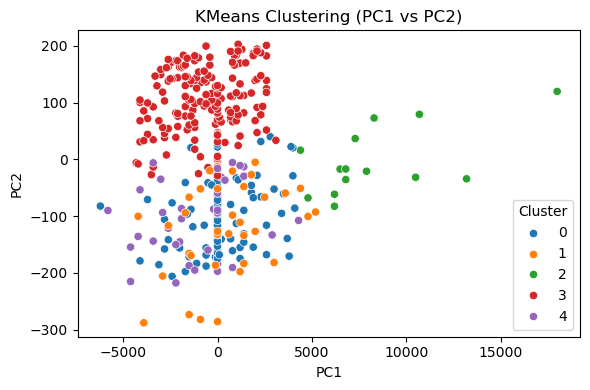

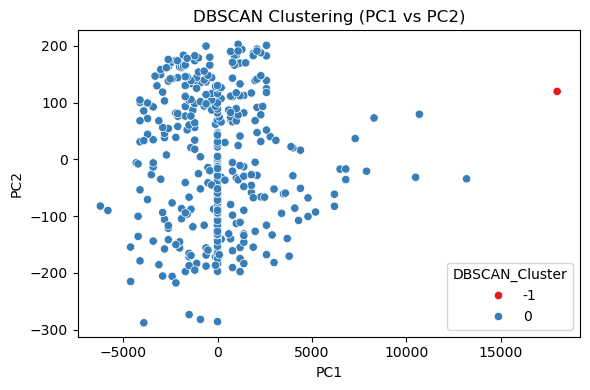

In [90]:
import seaborn as sns

# رسم KMeans خوشه‌ها
plt.figure(figsize=(6, 4))
sns.scatterplot(data=cluster_data_with_labels, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('KMeans Clustering (PC1 vs PC2)')
plt.tight_layout()
plt.show()

#  رسم DBSCAN خوشه‌ها
plt.figure(figsize=(6, 4))
sns.scatterplot(data=cluster_data_with_labels, x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='Set1')
plt.title('DBSCAN Clustering (PC1 vs PC2)')
plt.tight_layout()
plt.show()


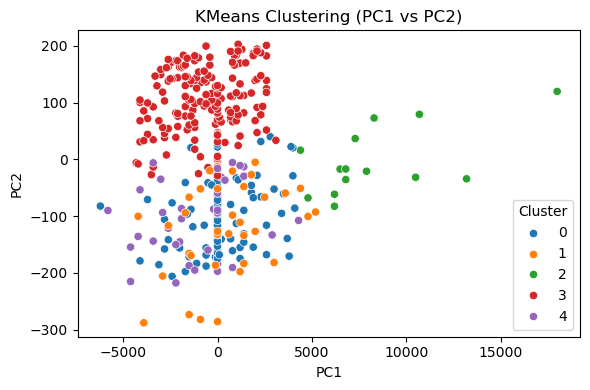

In [92]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=cluster_data_with_labels, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('KMeans Clustering (PC1 vs PC2)')
plt.tight_layout()
plt.show()


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# حذف ردیف‌هایی که کلاس ندارند
data = data.dropna(subset=['class'])

# تبدیل کلاس به برچسب عددی
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])

# ویژگی‌ها (X) و برچسب‌ها (y)
X = cluster_data 
y = data.loc[X.index, 'class_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [102]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# تعریف مدل‌ها
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# تعریف stratified 5-fold برای حفظ توزیع کلاس‌ها
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# اجرای cross validation و گرفتن نمرات دقت (accuracy)
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f'{name} 5-Fold CV Accuracy Scores: {scores}')
    print(f'{name} Mean CV Accuracy: {scores.mean():.4f}\n')


Logistic Regression 5-Fold CV Accuracy Scores: [1.         1.         0.98648649 1.         1.        ]
Logistic Regression Mean CV Accuracy: 0.9973

Random Forest 5-Fold CV Accuracy Scores: [0.97297297 0.94594595 1.         0.98648649 0.94520548]
Random Forest Mean CV Accuracy: 0.9701

KNN 5-Fold CV Accuracy Scores: [0.91891892 0.83783784 0.91891892 0.90540541 0.87671233]
KNN Mean CV Accuracy: 0.8916



In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# تابع ارزیابی مدل روی داده تست
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# ابتدا باید مدل‌ها رو تعریف و آموزش بدی
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_knn = KNeighborsClassifier()

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

# ارزیابی مدل‌ها
results = {}
for name, model in [('Logistic Regression', model_lr), ('Random Forest', model_rf), ('KNN', model_knn)]:
    results[name] = evaluate_model(model, X_test, y_test)
    print(f'{name} Evaluation:')
    for metric, value in results[name].items():
        print(f'  {metric}: {value:.4f}')
    print()


Logistic Regression Evaluation:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Random Forest Evaluation:
  Accuracy: 0.9640
  Precision: 0.9556
  Recall: 0.9556
  F1-Score: 0.9556

KNN Evaluation:
  Accuracy: 0.9009
  Precision: 0.8036
  Recall: 1.0000
  F1-Score: 0.8911



In [108]:
from sklearn.model_selection import GridSearchCV

# 1. Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # مقدار تنظیم وزن جریمه
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print('Best params for Logistic Regression:', grid_lr.best_params_)
print('Best CV accuracy:', grid_lr.best_score_)

# 2. Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print('Best params for Random Forest:', grid_rf.best_params_)
print('Best CV accuracy:', grid_rf.best_score_)

# 3. KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print('Best params for KNN:', grid_knn.best_params_)
print('Best CV accuracy:', grid_knn.best_score_)


Best params for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Best CV accuracy: 0.9961538461538462
Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 0.9806938159879337
Best params for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best CV accuracy: 0.9147812971342383


In [110]:
# تبدیل نتایج مرحله 3.e به جدول
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  1.000000   1.000000  1.000000  1.000000
Random Forest        0.963964   0.955556  0.955556  0.955556
KNN                  0.900901   0.803571  1.000000  0.891089


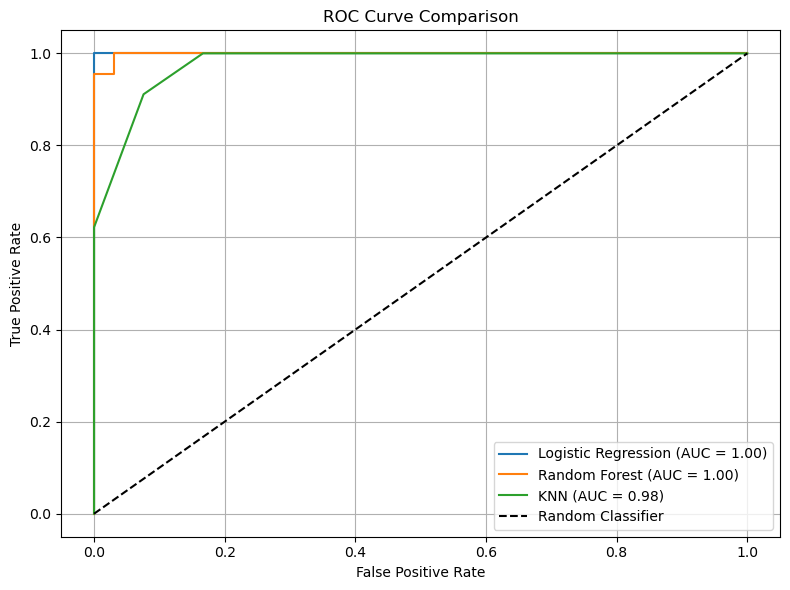

In [112]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# پیش‌بینی احتمالات برای کلاس مثبت (label=1)
y_scores_lr = model_lr.predict_proba(X_test)[:, 1]
y_scores_rf = model_rf.predict_proba(X_test)[:, 1]
y_scores_knn = model_knn.predict_proba(X_test)[:, 1]

# محاسبه FPR و TPR برای هر مدل
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)

# محاسبه AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_knn = auc(fpr_knn, tpr_knn)

# رسم نمودار ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
